## **Graph Visualization using Email Data from a Large European Research Institution**

**Submitted by:** Euclides, Umais

**Course:** DATA 620

**Data Source: Link:** https://snap.stanford.edu/data/email-Eu-core-temporal.html

### **Introduction**
The network was generated using email data from a large European research institution. We have anonymized information about all incoming and outgoing email between members of the research institution. The e-mails only represent communication between institution members (the core), and the dataset does not contain incoming messages from or outgoing messages to the rest of the world.

In the following we explore this network to identify the distribution of email communication. In particular we have an interest in the top collaborate within the research institution.  

### **Load Data and Creating the Networkx Graph**

In [ ]:

# Import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/engine2031/Data-Sets/refs/heads/main/email-Eu-core-temporal.txt"  


# Load the edgelist into a DataFrame
df = pd.read_csv(url, delim_whitespace=True, header=None, names=["source", "target", "time"])


# Drop the temporal column for simplification of analysis 
df.drop("time", axis=1, inplace=True)

print(df)
# Convert to NetworkX graph
G = nx.from_pandas_edgelist(df, "source", "target")

# Print graph info
print(G)

        source  target
0          582     364
1          168     472
2          168     912
3            2     790
4            2     322
...        ...     ...
332329     324     367
332330     790     126
332331     790     126
332332     782     126
332333     685     643

[332334 rows x 2 columns]
Graph with 986 nodes and 16064 edges


### **Creating a sub-graph for the top email contributors by network degree**

In [47]:
#Get the top 20 nodes by degree 
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]
print(top_nodes)
#Top ten IDs only
top_node_ids = [node for node, degree in top_nodes]
print(top_node_ids)

[(90, 345), (120, 232), (772, 231), (214, 219), (951, 216), (159, 214), (607, 183), (362, 178), (890, 175), (61, 171), (2, 169), (700, 168), (334, 166), (718, 162), (91, 157), (586, 152), (75, 144), (502, 144), (692, 140), (915, 140)]
[90, 120, 772, 214, 951, 159, 607, 362, 890, 61, 2, 700, 334, 718, 91, 586, 75, 502, 692, 915]


### **Graph Visualization for Top Email Participants**

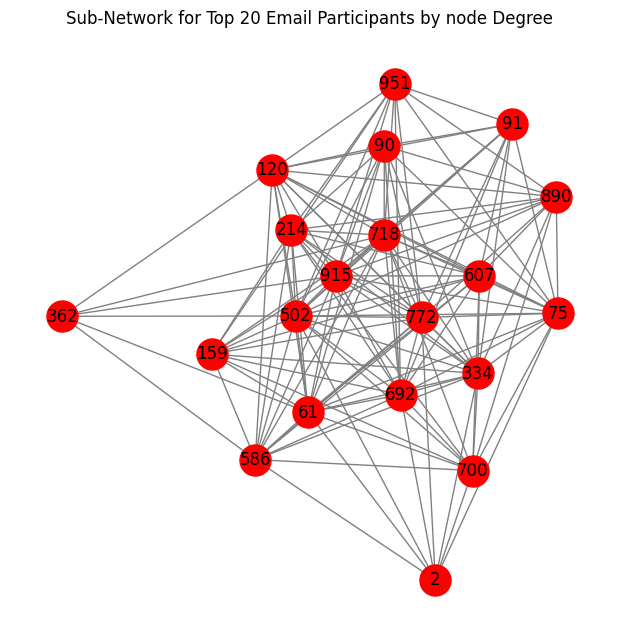

In [48]:
#Create subgraph with these nodes and their connections
subgraph = G.subgraph(top_node_ids)

#Plot Network 
plt.figure(figsize=(6,6))
nx.draw(subgraph, with_labels=True, node_color="red", edge_color="gray", node_size=500)

plt.title("Sub-Network for Top 20 Email Participants by node Degree")
plt.show()

### **Graph Diameter for Sub Network**
We see based on graph diameter of top email contributors that this organization has high collaboration.  The diameter for the entire sub-network consist of two steps for connection between any two nodes. 

In [49]:
#Print the diameter for the subnetwork
diameter = nx.diameter(subgraph)
print(diameter)

2
